# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` file.

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect.

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
df = add_id_column(df, 'Species')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here

In [8]:
# FIXME - get the correct values in x and Y for your dataset
x = df.drop(['Species', 'Id'], axis=1)
Y = df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [23]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [24]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [25]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

### Place pictures into the correct folder

In [26]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
    except:
        continue
    type_counts[dir]+=1
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


## Train ResNet50

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-05 16:24:22.338115: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
# FIXME - update the values below to match your dataset
img_size = 64
target_size = (img_size,img_size)
# Number of classification types
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through the entire dataset
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
number_of_epochs = 100

In [ ]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.04664125961717218, 'acc': 0.9816666603088379, 'f1_m': 0.9817708253860473, 'precision_m': 0.9817708373069763, 'recall_m': 0.9817708373069763, 'auc': 0.9979861378669739, 'false_negatives': 4.0, 'false_positives': 4.0, 'true_negatives': 236.0, 'true_positives': 116.0, 'mean_absolute_error': 0.023830056213773786, 'mean_squared_error': 0.008538454546578578, 'val_loss': 0.6148764431476593, 'val_acc': 0.8466666579246521, 'val_f1_m': 0.8466666102409363, 'val_precision_m': 0.8466666579246521, 'val_recall_m': 0.8466666579246521, 'val_auc': 0.9733332395553589, 'val_false_negatives': 4.0, 'val_false_positives': 4.0, 'val_true_negatives': 56.0, 'val_true_positives': 26.0, 'val_mean_absolute_error': 0.10374443978071213, 'val_mean_squared_error': 0.07977678775787353, 'lr': 0.00030539997883352046}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0028186142444610596, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_3': 0.9999999403953552, 'false_negatives_3': 0.0, 'false_positives_3': 0.0, 'true_negatives_3': 240.0, 'true_positives_3': 120.0, 'mean_absolute_error': 0.0017979273106902838, 'mean_squared_error': 0.0001470522693125531, 'val_loss': 0.6610658168792725, 'val_acc': 0.8999999761581421, 'val_f1_m': 0.8999999165534973, 'val_precision_m': 0.8999999761581421, 'val_recall_m': 0.8999999761581421, 'val_auc_3': 0.9422222375869751, 'val_false_negatives_3': 3.0, 'val_false_positives_3': 3.0, 'val_true_negatives_3': 57.0, 'val_true_positives_3': 27.0, 'val_mean_absolute_error': 0.07801878452301025, 'val_mean_squared_error': 0.06345812976360321, 'lr': 0.00049999997}


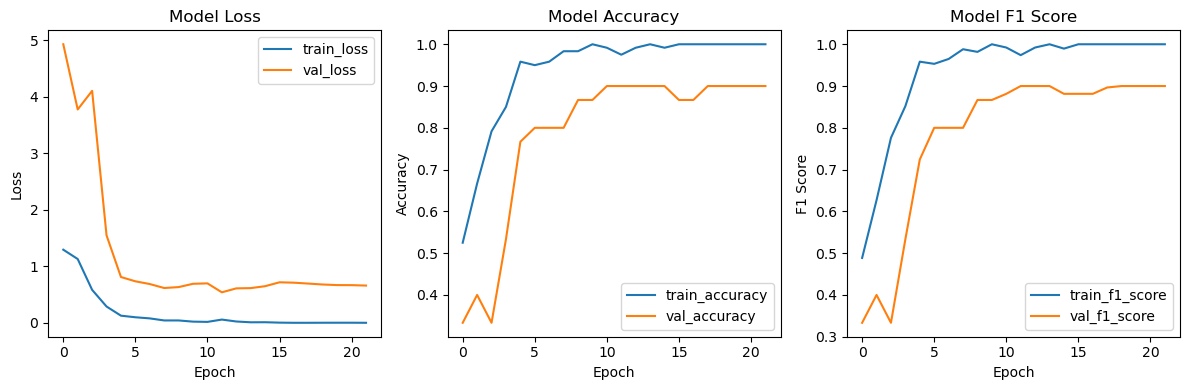

In [7]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [45]:
correlated_order = order_columns_by_correlation(df, 'Species', True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [46]:
correlated_df = df.reindex(columns=correlated_order)

In [48]:
x = correlated_df.drop(['Species', 'Id'], axis=1)
Y = correlated_df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


In [49]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [51]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [52]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

In [53]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
    except:
        continue
    type_counts[dir]+=1
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [2]:
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [5]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-05 16:25:25.065723: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-05 16:25:25.068797: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-05 16:25:25.099219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 16:25:25.099499: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-05 16:25:25.099518: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-05 16:25:25.102260: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-05 16:25:26.518525: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:25:26.518550: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:25:26.518571: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-05 16:25:26.520358: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-05 16:25:26.588912: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:25:26.588985: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:25:26.751231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-05 16:25:26.768009: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-05 16:25:30.617784: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-05 16:25:30.768697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-05 16:25:31.365906: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-05 16:25:31.405788: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2/4 [==============>...............] - ETA: 0s - loss: 1.6698 - acc: 0.2578 - f1_m: 0.2143 - precision_m: 0.2500 - recall_m: 0.1875 - auc: 0.4621 - false_negatives: 38.5000 - false_positives: 26.5000 - true_negatives: 69.5000 - true_positives: 9.5000 - mean_absolute_error: 0.4569 - mean_squared_error: 0.3085  

2023-03-05 16:26:01.176316: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:26:01.176370: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:26:01.235309: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:26:01.236795: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:26:01.244706: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 16:26:01.270471: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:26:01.300781: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_26_01
2023-03-05 16:26:01.322710: I tensorflow/core/profil

4/4 [==============================] - 77s 14s/step - loss: 1.4790 - acc: 0.3615 - f1_m: 0.3278 - precision_m: 0.3858 - recall_m: 0.2851 - auc: 0.5510 - false_negatives: 58.8000 - false_positives: 36.8000 - true_negatives: 132.8000 - true_positives: 26.0000 - mean_absolute_error: 0.4202 - mean_squared_error: 0.2754 - val_loss: 3.9833 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc: 0.5756 - val_false_negatives: 17.0000 - val_false_positives: 17.0000 - val_true_negatives: 43.0000 - val_true_positives: 13.0000 - val_mean_absolute_error: 0.3839 - val_mean_squared_error: 0.3144

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold0-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 77ms/step - loss: 0.8299 - acc: 0.6798 - f1_m: 0.6133 - precision_m: 0.6821 - recall_m: 0.5590 - auc: 0.8205 - false_negatives: 35.0000 - false_positi

2023-03-05 16:26:50.812838: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:26:50.812863: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:26:50.813001: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:26:50.813055: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.2612 - acc: 0.3363 - f1_m: 0.3176 - precision_m: 0.3949 - recall_m: 0.2656 - auc_1: 0.5547 - false_negatives_1: 29.0000 - false_positives_1: 16.0000 - true_negatives_1: 64.0000 - true_positives_1: 11.0000 - mean_absolute_error: 0.4213 - mean_squared_error: 0.2517

2023-03-05 16:26:55.082427: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:26:55.082458: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.2256 - acc: 0.3933 - f1_m: 0.3633 - precision_m: 0.4411 - recall_m: 0.3092 - auc_1: 0.6018 - false_negatives_1: 47.5000 - false_positives_1: 26.5000 - true_negatives_1: 117.5000 - true_positives_1: 24.5000 - mean_absolute_error: 0.4033 - mean_squared_error: 0.2386

2023-03-05 16:26:55.498613: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:26:55.502607: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:26:55.512794: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 16:26:55.549437: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:26:55.583126: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_26_55
2023-03-05 16:26:55.604997: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_26_55/drake-pc.trace.json.gz
2023-03-05 16:26:55.671

4/4 [==============================] - 6s 622ms/step - loss: 1.2040 - acc: 0.4130 - f1_m: 0.3791 - precision_m: 0.4579 - recall_m: 0.3240 - auc_1: 0.6177 - false_negatives_1: 52.6000 - false_positives_1: 29.2000 - true_negatives_1: 134.0000 - true_positives_1: 29.0000 - mean_absolute_error: 0.3968 - mean_squared_error: 0.2334 - val_loss: 8.9258 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_1: 0.5169 - val_false_negatives_1: 20.0000 - val_false_positives_1: 20.0000 - val_true_negatives_1: 40.0000 - val_true_positives_1: 10.0000 - val_mean_absolute_error: 0.4419 - val_mean_squared_error: 0.4330

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold1-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 0.7486 - acc: 0.7519 - f1_m: 0.7415 - precision_m: 0.7770 - recall_m: 0.7097 - auc_1: 0.8890 - false_negatives_

2023-03-05 16:27:03.936120: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:03.936147: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:27:03.936258: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:03.936319: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.4965 - acc: 0.3203 - f1_m: 0.2914 - precision_m: 0.3352 - recall_m: 0.2578 - auc_2: 0.5222 - false_negatives_2: 36.0000 - false_positives_2: 24.5000 - true_negatives_2: 71.5000 - true_positives_2: 12.0000 - mean_absolute_error: 0.4372 - mean_squared_error: 0.2853

2023-03-05 16:27:07.883910: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:07.883945: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3823 - acc: 0.3615 - f1_m: 0.3307 - precision_m: 0.3991 - recall_m: 0.2869 - auc_2: 0.5644 - false_negatives_2: 53.2500 - false_positives_2: 33.0000 - true_negatives_2: 119.0000 - true_positives_2: 22.7500 - mean_absolute_error: 0.4189 - mean_squared_error: 0.2650

2023-03-05 16:27:08.263715: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:27:08.266407: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:27:08.277093: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 16:27:08.315000: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:08.350937: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_08
2023-03-05 16:27:08.375751: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_08/drake-pc.trace.json.gz
2023-03-05 16:27:08.439

4/4 [==============================] - 6s 663ms/step - loss: 1.3438 - acc: 0.3775 - f1_m: 0.3474 - precision_m: 0.4187 - recall_m: 0.3024 - auc_2: 0.5824 - false_negatives_2: 57.8000 - false_positives_2: 35.6000 - true_negatives_2: 134.0000 - true_positives_2: 27.0000 - mean_absolute_error: 0.4110 - mean_squared_error: 0.2579 - val_loss: 4.3280 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc_2: 0.5756 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000 - val_true_negatives_2: 43.0000 - val_true_positives_2: 13.0000 - val_mean_absolute_error: 0.3898 - val_mean_squared_error: 0.3394

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold2-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.7131 - acc: 0.7110 - f1_m: 0.7190 - precision_m: 0.7654 - recall_m: 0.6792 - auc_2: 0.8891 - false_negatives_

2023-03-05 16:27:16.766684: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:16.766717: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:27:16.766861: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:16.766900: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.6525 - acc: 0.2188 - f1_m: 0.1929 - precision_m: 0.2342 - recall_m: 0.1641 - auc_3: 0.3962 - false_negatives_3: 39.5000 - false_positives_3: 25.0000 - true_negatives_3: 71.0000 - true_positives_3: 8.5000 - mean_absolute_error: 0.4769 - mean_squared_error: 0.3080 

2023-03-05 16:27:20.870715: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:20.870739: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5055 - acc: 0.3185 - f1_m: 0.2827 - precision_m: 0.3458 - recall_m: 0.2391 - auc_3: 0.4935 - false_negatives_3: 55.5000 - false_positives_3: 32.2500 - true_negatives_3: 119.7500 - true_positives_3: 20.5000 - mean_absolute_error: 0.4424 - mean_squared_error: 0.2769

2023-03-05 16:27:21.306744: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:27:21.308635: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:27:21.318530: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-05 16:27:21.353633: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:21.386390: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_21
2023-03-05 16:27:21.409288: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_21/drake-pc.trace.json.gz
2023-03-05 16:27:21.470

4/4 [==============================] - 6s 611ms/step - loss: 1.4702 - acc: 0.3448 - f1_m: 0.3101 - precision_m: 0.3797 - recall_m: 0.2622 - auc_3: 0.5208 - false_negatives_3: 60.0000 - false_positives_3: 34.0000 - true_negatives_3: 135.6000 - true_positives_3: 24.8000 - mean_absolute_error: 0.4323 - mean_squared_error: 0.2676 - val_loss: 63.8125 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_3: 0.5000 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 40.0000 - val_true_positives_3: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold3-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.9597 - acc: 0.7799 - f1_m: 0.7601 - precision_m: 0.8480 - recall_m: 0.6934 - auc_3: 0.9123 - false_negatives

2023-03-05 16:27:30.383768: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:30.383796: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:27:30.383911: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:30.383960: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.5973 - acc: 0.2902 - f1_m: 0.1905 - precision_m: 0.2323 - recall_m: 0.1615 - auc_4: 0.4742 - false_negatives_4: 37.0000 - false_positives_4: 24.0000 - true_negatives_4: 64.0000 - true_positives_4: 7.0000 - mean_absolute_error: 0.4541 - mean_squared_error: 0.2863 

2023-03-05 16:27:34.425196: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:27:34.425221: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5021 - acc: 0.3226 - f1_m: 0.2342 - precision_m: 0.2769 - recall_m: 0.2036 - auc_4: 0.5212 - false_negatives_4: 56.7500 - false_positives_4: 37.2500 - true_negatives_4: 110.7500 - true_positives_4: 17.2500 - mean_absolute_error: 0.4347 - mean_squared_error: 0.2742

2023-03-05 16:27:34.823460: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:27:34.825877: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:27:34.842675: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1734 callback api events and 1682 activity events. 
2023-03-05 16:27:34.892216: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:27:34.921510: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_34
2023-03-05 16:27:34.944367: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_05_16_27_34/drake-pc.trace.json.gz
2023-03-05 16:27:35.002

4/4 [==============================] - 6s 611ms/step - loss: 1.4694 - acc: 0.3364 - f1_m: 0.2512 - precision_m: 0.2940 - recall_m: 0.2201 - auc_4: 0.5395 - false_negatives_4: 62.2000 - false_positives_4: 41.0000 - true_negatives_4: 125.4000 - true_positives_4: 21.0000 - mean_absolute_error: 0.4267 - mean_squared_error: 0.2690 - val_loss: 19.9563 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_4: 0.4889 - val_false_negatives_4: 20.0000 - val_false_positives_4: 20.0000 - val_true_negatives_4: 40.0000 - val_true_positives_4: 10.0000 - val_mean_absolute_error: 0.4447 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold4-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.6661 - acc: 0.8010 - f1_m: 0.7967 - precision_m: 0.8062 - recall_m: 0.7875 - auc_4: 0.9162 - false_negatives

In [6]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.03793000616133213, 'acc': 0.9883333444595337, 'f1_m': 0.9856398582458497, 'precision_m': 0.9864079236984253, 'recall_m': 0.9848958253860474, 'auc': 0.9980381727218628, 'false_negatives': 4.0, 'false_positives': 3.0, 'true_negatives': 237.0, 'true_positives': 116.0, 'mean_absolute_error': 0.01530453898012638, 'mean_squared_error': 0.0068885367829352616, 'val_loss': 1.6642150044441224, 'val_acc': 0.6666666746139527, 'val_f1_m': 0.6701148867607116, 'val_precision_m': 0.6738095283508301, 'val_recall_m': 0.6666666746139527, 'val_auc': 0.894444465637207, 'val_false_negatives': 8.0, 'val_false_positives': 8.0, 'val_true_negatives': 52.0, 'val_true_positives': 22.0, 'val_mean_absolute_error': 0.21277974247932435, 'val_mean_squared_error': 0.1800244390964508, 'lr': 0.00420499989631935}


In [7]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.08498195558786392, 'acc': 0.9750000238418579, 'f1_m': 0.9698660373687744, 'precision_m': 0.9737063050270081, 'recall_m': 0.9661458134651184, 'auc': 0.9980381727218628, 'false_negatives': 4.0, 'false_positives': 3.0, 'true_negatives': 237.0, 'true_positives': 116.0, 'mean_absolute_error': 0.026043513789772987, 'mean_squared_error': 0.015617975033819675, 'val_loss': 1.0165047645568848, 'val_acc': 0.7333333492279053, 'val_f1_m': 0.7333332896232605, 'val_precision_m': 0.7333333492279053, 'val_recall_m': 0.7333333492279053, 'val_auc': 0.894444465637207, 'val_false_negatives': 8.0, 'val_false_positives': 8.0, 'val_true_negatives': 52.0, 'val_true_positives': 22.0, 'val_mean_absolute_error': 0.18251998722553253, 'val_mean_squared_error': 0.16033700108528137, 'lr': 0.00049999997}


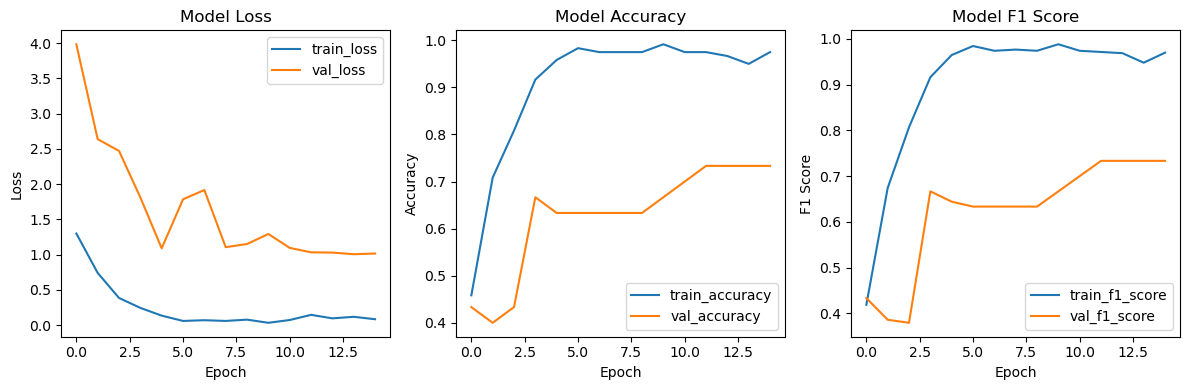

In [8]:
plot_metrics(best_model.history)